### Connect to database
- Connect to the database
- Query the staticfile by limit"
- return the array of staticfile 

In [5]:
import mysql.connector
from mysql.connector import errorcode
import array

def get_staticfiles(limit=1) -> array:
    try:
        context = mysql.connector.connect(
            user='root',
            password="P@ssw0rd",
            host="eng-api-db",
            database="EngStaticFileService"
        )

        cursor = context.cursor()

        QUERY = (
            "SELECT *  FROM StaticFiles "
            f"LIMIT {limit};"
        )

        cursor.execute(QUERY)

        # for cols in cursor:
        #     data = f"{cols[0]} {cols[5]} {cols[8]}"
        #     print(cols[3])
        return cursor.fetchall()

    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
    finally:
        cursor.close()
        context.close()

In [6]:
def get_payment_methods(limit=1) -> array:
    try:
        context = mysql.connector.connect(
            user='root',
            password="P@ssw0rd",
            host="eng-api-db",
            database="EngPaymentService"
        )

        cursor = context.cursor()

        QUERY = (
            "SELECT *  FROM PaymentMethods "
            f"LIMIT {limit};"
        )

        cursor.execute(QUERY)

        # for cols in cursor:
        #     data = f"{cols[0]} {cols[5]} {cols[8]}"
        #     print(cols[3])
        return cursor.fetchall()

    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
    finally:
        cursor.close()
        context.close()

### Display the binary image
- Get the binary file from staticfile
- Display the binary image

required packages:
```python
pip3 install Pillow
```

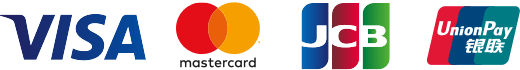

In [7]:
# make sure to run 
from PIL import Image
import base64
import struct
import io

bin_img = get_payment_methods(1)[0][4]
# base64_img = base64.b64encode(bin_img)
# base64_img = base64.b64decode(base64_img)
img_io_bytes = io.BytesIO(bin_img)
image = Image.open(img_io_bytes)
image.show()
# image.save('./save.png')

### List all images
- list all the images
- insert into pandas df
- Create a column derived from existing 
- display the images
- check if the image endpoint exist or not

required packages:
```bash
pip3 install pandas
```

In [8]:
import os
import pandas as pd

# list all the images
# insert into pandas df
image_names = os.listdir('./static')
img_df = pd.DataFrame({'Name': image_names})

In [9]:
# Create a column derived from existing column
endpoint = 'https://api.winonafeminine.co/Statics/www'
img_df['Url'] = endpoint + "/" + img_df['Name']

Status code: 200
url: https://api.winonafeminine.co/Statics/www/6bc6d2c4-e93b-4ea5-8173-9b36485225cf10.jpeg


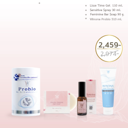

Status code: 200
url: https://api.winonafeminine.co/Statics/www/f92fa95c-ac08-4305-809d-c47358a0b4b0274396605_4352675441499519_4612187678963993054_n.png


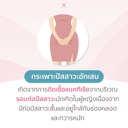

Status code: 200
url: https://api.winonafeminine.co/Statics/www/19d904e8-5631-4673-b1fd-9db6e51fa112278389212_4484412388325823_1270946231729334861_n.png


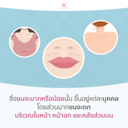

In [10]:
# display the images
import requests
for (ind, col_val) in enumerate(img_df['Url'][:3]):
    img_res = requests.get(col_val, stream=True)
    print(f"Status code: {img_res.status_code}")
    print(f"url: {col_val}")
    raw_img = Image.open(img_res.raw)
    raw_img.thumbnail((128, 128))
    raw_img.show()

In [14]:
# check if the image endpoint exist or not
img_df['Image exist'] = False
img_df['Image exist'] = img_df['Url'].apply(lambda x: True if requests.get(x, stream=True).status_code == 200 else False)
img_df

,Name,Url,Image exist
0,6bc6d2c4-e93b-4ea5-8173-9b36485225cf10.jpeg,https://api.winonafeminine.co/Statics/www/6bc6...,True
1,f92fa95c-ac08-4305-809d-c47358a0b4b0274396605_...,https://api.winonafeminine.co/Statics/www/f92f...,True
2,19d904e8-5631-4673-b1fd-9db6e51fa112278389212_...,https://api.winonafeminine.co/Statics/www/19d9...,True
3,c34fd1b5-7014-4162-8163-05622d9bb468273987343_...,https://api.winonafeminine.co/Statics/www/c34f...,True
4,7f9cead3-b2b7-4f02-8917-76b37c91140a12.jpeg,https://api.winonafeminine.co/Statics/www/7f9c...,True
...,...,...,...
150,8b076fd6-2854-4624-8e16-aa1075c0259c21.jpeg,https://api.winonafeminine.co/Statics/www/8b07...,True
151,f5997c45-e901-4575-9fe6-6eeac7a358c44.jpeg,https://api.winonafeminine.co/Statics/www/f599...,True
152,023c7452-f95a-4d02-ab69-50269883474d272404872_...,https://api.winonafeminine.co/Statics/www/023c...,True
153,8da2344d-04ae-4636-b203-2ac5305c6410274463037_...,https://api.winonafeminine.co/Statics/www/8da2...,True


In [15]:
img_df.loc[img_df['Image exist'] == False]

,Name,Url,Image exist
15,1cf07604-9bf0-409d-b1f9-f843a32f9f79Screenshot...,https://api.winonafeminine.co/Statics/www/1cf0...,False
99,.gitignore,https://api.winonafeminine.co/Statics/www/.git...,False


### Reupdate the database with new compressed images
- load the db into df
- get image from the url
- convert image into binary
- assign into uncompressed_static_df
- display the binary image
- resize/compress the image
- save to db

In [16]:
# pip3 install sqlalchemy
# load the db into df
context = mysql.connector.connect(
            user='root',
            password="P@ssw0rd",
            host="eng-api-db",
            database="EngStaticFileService"
        )
static_query = ("SELECT * FROM `StaticFiles`")
static_df = pd.read_sql(static_query, context)

/tmp/ipykernel_36888/576499472.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  static_df = pd.read_sql(static_query, context)


'Name: static/6bc6d2c4-e93b-4ea5-8173-9b36485225cf10.jpeg'

'Type: JPEG'

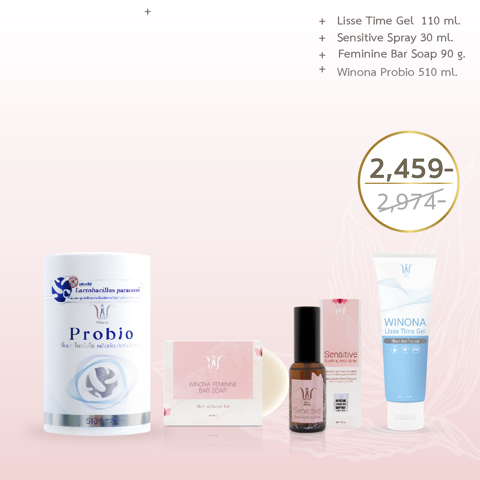

In [17]:
img_path = os.listdir('./static')

ex_img_path = os.path.join('static', img_path[0])
ex_img = Image.open(ex_img_path)
ex_img.thumbnail((640, 480))
display(f'Name: {ex_img_path}')
display(f'Type: {ex_img.format}')
ex_img.show()

status code: 200


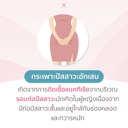

In [18]:
# get the image
# convert image to binary
# display the binary image
from urllib.request import urlopen

byte_img = urlopen(img_df['Url'][1])
print(f'status code: {byte_img.status}')
byte_img = byte_img.read()
img = Image.open(io.BytesIO(byte_img))
img.thumbnail((128, 128))
img.show()



In [19]:
final_static_df = static_df.copy()

def url_to_byte(x):
    # to avoid whitespace error
    url = x.replace(" ", "%20")
    res = urlopen(url)
    if res.status == 200:
        return res.read()
    return b''

final_static_df['FileData'] = final_static_df['Url'] \
    .apply(lambda x: url_to_byte(x))

Displaying uncompressed binary images
51. b9b152a1-4275-4711-9212-8d4aee2b0b7d276029367_4419005931533136_6628404142674769436_n.png
URL: https://api.winonafeminine.co/Statics/www/b9b152a1-4275-4711-9212-8d4aee2b0b7d276029367_4419005931533136_6628404142674769436_n.png
Size: 901 bytes


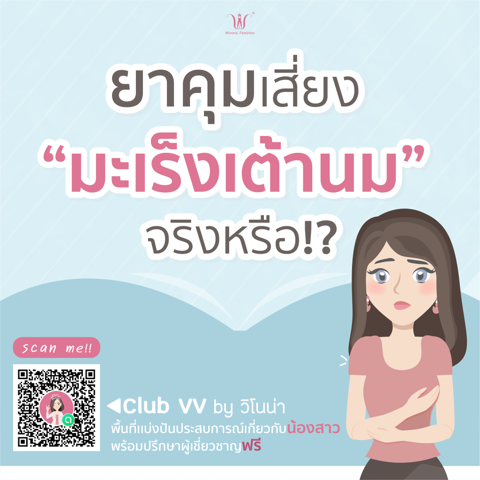

In [20]:
# check if it work or not
import sys

print("Displaying uncompressed binary images")
# result = final_static_df.head(1)
result = final_static_df.loc[final_static_df['Url'] == 'https://api.winonafeminine.co/Statics/www/b9b152a1-4275-4711-9212-8d4aee2b0b7d276029367_4419005931533136_6628404142674769436_n.png']
for ind, row in result.iterrows():
    img_name = row['Name']
    img_url = row['Url']
    img_file_size = int(sys.getsizeof(row['FileData'])/1024)

    # Printing the metadata
    print(f'{ind+1}. {img_name}')
    print(f'URL: {img_url}')
    print(f'Size: {img_file_size} bytes')

    # resize and display the image
    by_img = Image.open(io.BytesIO(row['FileData']))
    by_img.thumbnail((640, 480))
    by_img.show()

Displaying compressed binary images
Current size: 901


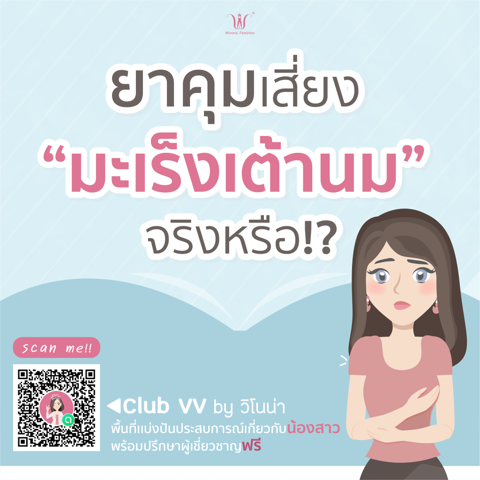

In [28]:
# try resizing the image
import sys
import base64
from pathlib import Path

print("Displaying compressed binary images")
result = final_static_df.copy()
for ind, row in result.iterrows():
    img_name = row['Name']
    img_url = row['Url']
    img_file_size = int(sys.getsizeof(row['FileData'])/1024)

    # Printing the metadata
    # print(f'{ind+1}. {img_name}')
    # print(f'URL: {img_url}')
    # print(f'Previous Size: {img_file_size} Kb')

    # resize the image
    # culculate the size
    # display the image
    # save the image in output
    by_img = Image.open(io.BytesIO(row['FileData']))
    height, width = by_img.size
    resized_img = by_img.resize((height, width), Image.Resampling.LANCZOS)
    output_name = row['Name']
    output_path = Path(f'./output/{output_name}')
    dest_path = output_path.with_suffix('.webp')
    # print(f'Saving image as {output_path}')
    resized_img.save(dest_path, format="webp")

    # open the newly save image as bytes
    # culculate the size
    # display the image
    new_byte_img = b''
    with open(dest_path, 'rb') as new_file:
        new_byte_img = new_file.read()
    # new_img_file_size = int(sys.getsizeof(new_byte_img)/1024)
    # print(f'New size: {new_img_file_size} Kb')
    # new_img = Image.open(io.BytesIO(new_byte_img))
    # new_img.thumbnail((640, 480))
    # new_img.show()

    # assign the new image to FileData
    # culculate the size
    # display the image
    # row['FileData'] = new_byte_img
    result.at[ind, 'FileData'] = new_byte_img # update the data within dataframe
    result.at[ind, 'FileType'] = 'image/webp' # update the data within dataframe

    if row['Url'] == 'https://api.winonafeminine.co/Statics/www/b9b152a1-4275-4711-9212-8d4aee2b0b7d276029367_4419005931533136_6628404142674769436_n.png':
        final_file_data_size = int(sys.getsizeof(row['FileData'])/1024)
        print(f'Current size: {final_file_data_size}')
        file_data_img = Image.open(io.BytesIO(row['FileData']))
        file_data_img.thumbnail((640, 480))
        file_data_img.show()

In [29]:
img_result_size = int(sys.getsizeof(result['FileData'].head(1).values[0])/1024)
print(f'Result size: {img_result_size}')

Result size: 39


In [30]:
def iter_result(cursor, context):
    QUERY = (
            "UPDATE StaticFiles "
            "SET FileData = %s, FileType = %s "
            "WHERE Url = %s"
        )
    
    for ind, row in result.iterrows():
        cursor.execute(QUERY, (row['FileData'], row['FileType'], row['Url']))
        # Make sure data is committed to the database
        context.commit()

In [31]:
import mysql.connector
from mysql.connector import errorcode
import array

def update_staticfiles(callback) -> array:
    try:
        static_context = mysql.connector.connect(
            user='root',
            password="P@ssw0rd",
            host="eng-api-db",
            database="EngStaticFileService"
        )

        static_cursor = static_context.cursor()
        callback(static_cursor, static_context)

    except mysql.connector.Error as err:
        if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
            print("Something is wrong with your user name or password")
        elif err.errno == errorcode.ER_BAD_DB_ERROR:
            print("Database does not exist")
        else:
            print(err)
    finally:
        static_cursor.close()
        static_context.close()

In [32]:
# run the update
update_staticfiles(iter_result)

### convert png to webpack
